In [1]:
!pip install tensorflow
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import pandas as pd
import contractions
import textblob
import re, string, unicodedata

from tqdm import tqdm

#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Suicide_Detection.csv to Suicide_Detection.csv


In [4]:
data_file="Suicide_Detection.csv"
Suicide_data= pd.read_csv(data_file)

In [5]:
Suicide_data.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [6]:
# Defining Functions to clean the text
def clean_contractions(text):
    """Replace contractions in string of text"""
    text = contractions.fix(text)
    return text

def remove_html_tags_func(text):
     return BeautifulSoup(text, 'html.parser').get_text()
    
def remove_url_func(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_accented_chars_func(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

#def spell_correct(text):
    #text = spelling(text)
    #return text
# create an instance of the Spelling class


def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

def remove_extra_whitespaces_func(text):
     return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def remove_duplicates(text):
    words = text.split(" ")
    result = []
    for word in words:
        if word not in result:
            result.append(word)
    return " ".join(result)

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [7]:
Suicide_data_raw= Suicide_data[['class', 'text']]
Suicide_data_raw.sample(5, random_state= 2)

,class,text
115313,suicide,You.‍‍‍‍I feel I deserve nothing. How many liv...
78611,suicide,Laters whoever knows me via this accountI’m cu...
199074,suicide,"Telling my best friend..I need help, how do i ..."
112519,non-suicide,unpopular opinion. Murder is wrong. Murderers ...
160158,suicide,Going to hang myself sitting downI have a rope...


In [8]:
#Applying the cleaning functions to the dataset
Suicide_data_raw['clean_text'] = Suicide_data_raw['text'].str.lower()
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(clean_contractions)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_html_tags_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_url_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_accented_chars_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_punctuation_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(reduce_lengthening)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_irr_char_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_extra_whitespaces_func)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_duplicates)
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(remove_emoji)

<ipython-input-6-07c6c6f10029>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [10]:
stop_words = stopwords.words('english')
Suicide_data_raw['clean_text'] = Suicide_data_raw['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [11]:
#Selecting the class and the clean text columns
Suicide_data_clean= Suicide_data_raw[['class', 'clean_text']]
Suicide_data_clean.tail(10)

,class,clean_text
232064,non-suicide,ba ad comes naturally song makes feel like lsd
232065,non-suicide,know one cares anyways fighting sans undertale...
232066,suicide,mom tried kill today feel lost second time hap...
232067,suicide,fucking scummy person cannot change itever sin...
232068,non-suicide,something today went sledding friends may seem...
232069,non-suicide,like rock going get anything go
232070,non-suicide,tell many friends lonely everything deprived p...
232071,non-suicide,pee probably tastes like salty tea someone dra...
232072,suicide,usual stuff find herei posting sympathy pity k...
232073,non-suicide,still beaten first boss hollow knight fought t...


In [12]:
#Encoding the class using a mapping function
Suicide_data_clean['class'] = Suicide_data_clean['class'].map({'suicide': 1, 'non-suicide':0})

<ipython-input-12-2babc6e93375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Suicide_data_clean['class'] = Suicide_data_clean['class'].map({'suicide': 1, 'non-suicide':0})


In [13]:
Suicide_data_clean.tail()

,class,clean_text
232069,0,like rock going get anything go
232070,0,tell many friends lonely everything deprived p...
232071,0,pee probably tastes like salty tea someone dra...
232072,1,usual stuff find herei posting sympathy pity k...
232073,0,still beaten first boss hollow knight fought t...


In [14]:
!pip install -q transformers   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00


In [15]:
import numpy as np
import gc
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import transformers
from transformers import TFAutoModel, AutoTokenizer
from keras.utils import np_utils
from transformers import TFAutoModel
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors

from transformers import *  # this is HuggingFace library
#import tensorflow as tf
from transformers import  DistilBertModel, DistilBertConfig

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(


In [16]:
df = Suicide_data_clean.sample(frac=1)  
split=int(df.shape[0]*0.2)        
test = df.iloc()[:split,:]                                                        # Create a test set by selecting the first `split` rows of the DataFrame `df`

train = df.iloc()[split:,:]                                                  

In [17]:
"""
define parameters
"""

EPOCHS =6                                                                       #   number of training epochs
BATCH_SIZE = 128                                                                #   batch size
MAX_LEN = 128                                                                   #   maximum length of sequence
MODEL = 'distilbert-base-uncased'                                                #   pretrained bert model for sequence classification.
model_path= "distilbert1"


In [18]:
tokenizer=AutoTokenizer.from_pretrained(MODEL)    

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.28.1",
  "vocab_size": 30522
}



loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropo

In [19]:
df

,class,clean_text
2036,1,sure need helphello yo french dude depressed s...
218714,1,scaredi wanting commit suicide long time morni...
115448,0,idea would love follow solution big teenage an...
163050,1,know anymore living constant sinking feeling i...
71021,0,honestly wear mask class sitting front compute...
...,...,...
82866,1,think appointment set upafter school maybe aro...
152242,0,know count binary
124610,0,find friend transferring tiny school new also ...
81243,0,biggest flex mom worked microsoft lived cruise...


In [20]:
import numpy as np
def regular_encode(texts: list, tokenizer:object, maxlen: int =512)-> np.array:   # Define a function to encode text data using a tokenizer
  
  """
  This function encodes a given list of text corpora with an instance of
  tokenizer given. It is used to encode training and test data.
  
  Arguments:
    texts: A list of text corpus.
    tokenizer: An instance of a tokenizer object.
    maxlen: An integer specifying the maximum length of the encoded sequences.

  Returns:
    A numeric array of encoded text.
  """
  enc_di = tokenizer.batch_encode_plus(texts,                                     # Encode the dataset using the given tokenizer
                                       return_token_type_ids= False,
                                       pad_to_max_length= True,
                                       max_length=maxlen)                       
  return np.array(enc_di["input_ids"])                                            #   return encoded ids


x_train = regular_encode(train.clean_text.tolist(), tokenizer, maxlen=MAX_LEN)     #   encode training dataset
x_test = regular_encode(test.clean_text.tolist(), tokenizer, maxlen=MAX_LEN)       #   encode test dataset

                                                    
y_train = np_utils.to_categorical(train["class"].values)                                      #   encode the labels for train dataset into a one-hot vector
y_test= np_utils.to_categorical(test["class"].values)                                         #   encode the labels for test dataset into a one-hot vector



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
# Define a function to convert the input arrays to a Keras-friendly tf.data.Dataset object
def build_dataset(x, y):
    """
    This function converts the input arrays to a Keras-friendly tf.data.Dataset object.
    Arguments:
    x: A numeric array of encoded text.
    y: A numeric array of one-hot encoded labels.
    Returns:
    A batched tf.data.Dataset object of the given x and y arrays.
    """
    dataset= tf.data.Dataset.from_tensor_slices((x,y)).batch(BATCH_SIZE)                          # Convert the input arrays to a tf.data.Dataset object and batch the data
    return dataset                                                                               #   return the dataset object

train_dataset=(build_dataset(x_train, y_train))                                                #   convert the training dataset to a tf.data.Dataset object
test_dataset=(build_dataset(x_test, y_test))                                            #   convert the test dataset to a tf.data.Dataset object

In [22]:
model_x = TFAutoModel.from_pretrained(MODEL)                                                              #   initialize the specified pretrained model 

def model_II(transformer=model_x, max_len=MAX_LEN, n_classes=2):
  """
  ==============================================================================
  this function builds a classification model on the specified transformer model
  ----------------------------------------------------------------------------
  ARGUMENTS:
    NAME: transformer
    DESCRIPTION: an instance of a pretrained transformer layer
    DTYPE: keras layer
    VALUE: model_x

    NAME: max_len
    DESCRIPTION: maximum length of sequence in dataset
    DTYPE: int
    VALUE: MAX_LEN

    NAME: n_classes
    DESCRIPTION: number of class for classification
    DTYPE: int
    VALUE: 6
  """                                
  
  learning_rate = 2e-5                                                                                 #   define the learning rate
  input_word_ids = tf.keras.layers.Input(shape=(max_len,),dtype=tf.int32, name="input_word_idsr")      #   define the input layer
    #(i)
  sequence_output=transformer(input_word_ids)[0]                                                       #   add the transformer layer to the input layer
  cls_token = sequence_output[:, 0, :]         

  output = Dense(32,activation='relu')(cls_token)                                                       #add  a connected layer and a dropout layer      
  output = Dropout(0.2)(output)
  out = Dense(2,activation='softmax')(output)                                                           # add output layer with softmax activation
  
  model= tf.keras.Model(inputs=input_word_ids, outputs=out)                                            #   instatiate a keras model with the given configuration
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])      #   compile with categorical_crossentropy
  
  return model                                                                                         #   return compiled model

model = model_II()                                                              #   instantiate model object
model.summary()                                                                 #   print model summary

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.28.1",
  "vocab_size": 30522
}



loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/1c4513b2eedbda136f57676a34eea67aba266e5c/tf_model.h5
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoi

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_idsr (InputLayer  [(None, 128)]            0         
 )                                                               
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 128,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense (Dense)               (None, 32)                24608 

In [26]:
train_history = model.fit(train_dataset,                                          #train model on the training dataset
                          epochs=2,                                               # set the number of epochs to 1
                          validation_data= test_dataset)                          # validate the model on the test dataset

1451/1451 [==============================] - 2199s 2s/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5009


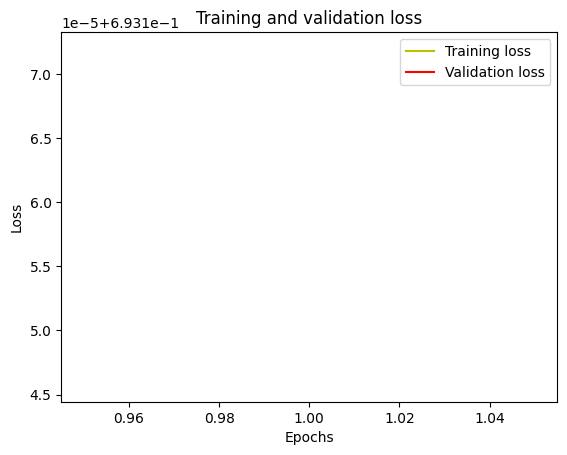

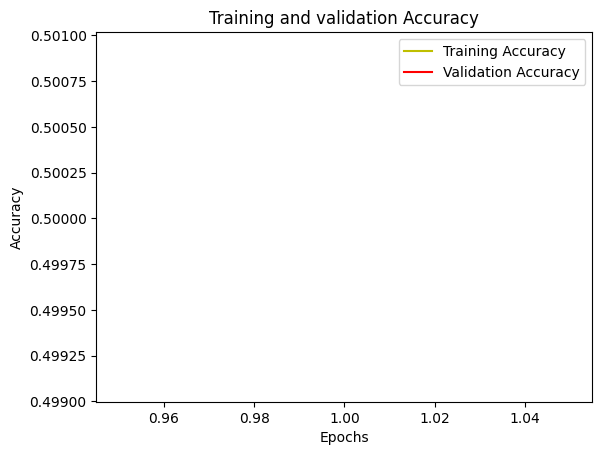

In [27]:
from matplotlib import pyplot as plt
# Extract training and validation loss values from training history
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# Create range for x-axis (epochs)
epochs = range(1, len(loss) + 1)

# Plot training and validation loss over epochs
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract training and validation accuracy values from training history
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

# Plot training and validation accuracy over epochs
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

# predict on the test dataset using the trained model
y_pred = model.predict(test_dataset)

# convert the one-hot encoded labels back to integers
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# print the classification report
target_names = ['non-suicidal','suicidal']  
print(classification_report(y_test_int, y_pred_int, target_names=target_names))


363/363 [==============================] - 185s 509ms/step
              precision    recall  f1-score   support

non-suicidal       0.50      1.00      0.67     23250
    suicidal       0.00      0.00      0.00     23164

    accuracy                           0.50     46414
   macro avg       0.25      0.50      0.33     46414
weighted avg       0.25      0.50      0.33     46414



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

#Converting the multilabel- indicator format of y-test into binary format
y_test_binary=np.argmax(y_test, axis =1)


# Convert the predicted probabilities to binary labels
threshold = 0.5
predicted_labels = (y_pred[:, 1] > threshold).astype(int)

 # Print the classification report
target_names = ['non-suicidal','suicidal']  
print(classification_report(y_test_binary, predicted_labels, target_names=target_names)) 